## Tokenization lab
LLM's and ChatGPT | Fall 2023 | McSweeney | CUNY Graduate Center

**Due:** October 8


### Background
The purpose of this lab is to explore different tokenization methods. On their own, tokenization methods don't do much. However, they are the starting place for all natural language processing. 


#### Notes
This is a short lab using the same dataset throughout. Feel free to switch it up, but once you are comfortable with how the different alogorithms approach the task of breaking up text, move on. 

You will be using the `datasets` package. You can [install the package](https://pypi.org/project/datasets/) with `$ pip install datasets`. If you do not have `pip` or `conda` installed on your machine, please install it now.

In [1]:
import nltk
import timeit

from datasets import load_dataset

/Users/michaelsmith/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The next cell is just downloading the dataset. You need to be connected to the internet for this to work. 

This dataset is hosted by [Hugging Face](https://huggingface.co). Hugging Face hosts machine learning models, datasets, and more. We will reference them again. It's a great place to find corpora. 


The dataset is called [American Stories](https://huggingface.co/datasets/dell-research-harvard/AmericanStories). Please skim the Dataset Card. All models and datasets on the Hugging Face hub have these associated cards. 

In [2]:
# Decide what year you want between 1810 and 1963

my_year = "1960"

# Decide how many articles you want to work with (keep this small - it's slow)
num_articles = 10

#  Download data for your choice of year (1810 to 1963)
dataset = load_dataset("dell-research-harvard/AmericanStories",
    "subset_years",
    year_list=[my_year]
)

# Get the first n articles from that year
# instantiate the counter
i=0
# instantiate the string
my_articles = ''
# loop through each article for that year
for article in dataset[my_year]:
    #the article is a dictionary, 
    #we're getting the text of the article by accessing the key, "article"
    my_articles += article.get('article')
    #add one to our counter
    i+=1
    #if the counter is greater than num_articles-1, stop looping
    if i>(num_articles-1): break
    
#validate that it is what we expect by checking on first 100 characters
print(my_articles[:1000])


Only taking a subset of years. Change name to 'all_years' to use all years in the dataset.
{'1960': 'https://huggingface.co/datasets/dell-research-harvard/AmericanStories/resolve/main/faro_1960.tar.gz'}


Generating 1960 split: 1768 examples [00:00, 17625.89 examples/s]

Loading associated


Generating 1960 split: 344550 examples [00:17, 19838.49 examples/s]

SAN FRANCISCO. Nov. 10
(AP).-Alvin Dark made his
first decisions yesterday as
manager Of the San Francisco
Giants. He hired two former
teammates as coaches.


Dark was signed last week,
Yesterday he selected Larry
Jansen and Whitley Lockman
and retained Yves Westrum and
Salty Parker for his coaching
staff. Bill Posedel was re-
leased to make way for Jansen
as boss Of the bullpen.


Dark. Jansen and Lockman-
stars when they played for the
Giants have a lot in common
They have regulations al
gentlemen, quiet craftsmen whc
let their feats on the field speal
for them.


Dark hit 1922 in his rookie
season with the Boston Brave.
and was named rookie of thu
year l948 by the major league
baseball writer's.


AS lean. smiling youngstel
of 18, Lockman stepped intC
Mel Otis No. 3 batting spot IL
midsummer Of 1945 anchead last Saturday when Mon
treal lost in q cup playoff with
out throwing a pass In the last
half. Moss said it was because
of Etcheverry's sore arm. The
player said his arm was SOUND

This section is for formatting. It removes almost all the markup in these articles. It's a fairly standard set of character encodings.

In [3]:
#remove new line and other formatting characters
for char in ["\n", "\r", "\d", "\t"]:
    my_articles = my_articles.replace(char, " ")
my_articles[:1000]

"SAN FRANCISCO. Nov. 10 (AP).-Alvin Dark made his first decisions yesterday as manager Of the San Francisco Giants. He hired two former teammates as coaches.   Dark was signed last week, Yesterday he selected Larry Jansen and Whitley Lockman and retained Yves Westrum and Salty Parker for his coaching staff. Bill Posedel was re- leased to make way for Jansen as boss Of the bullpen.   Dark. Jansen and Lockman- stars when they played for the Giants have a lot in common They have regulations al gentlemen, quiet craftsmen whc let their feats on the field speal for them.   Dark hit 1922 in his rookie season with the Boston Brave. and was named rookie of thu year l948 by the major league baseball writer's.   AS lean. smiling youngstel of 18, Lockman stepped intC Mel Otis No. 3 batting spot IL midsummer Of 1945 anchead last Saturday when Mon treal lost in q cup playoff with out throwing a pass In the last half. Moss said it was because of Etcheverry's sore arm. The player said his arm was SOUN

# Whitespace tokenization


First we'll just break up the words using whitespace. As noted in class, this is a really common first pass. 

In [4]:
%%time
#this is a magic function to determine how long a cell takes to run. 
#It MUST be the first thing in a cell

#split the whole string on spaces. This returns a list
whitespace_tokens = my_articles.split(' ')

#check the list
whitespace_tokens[:20]

CPU times: user 150 µs, sys: 1e+03 ns, total: 151 µs
Wall time: 155 µs


['SAN',
 'FRANCISCO.',
 'Nov.',
 '10',
 '(AP).-Alvin',
 'Dark',
 'made',
 'his',
 'first',
 'decisions',
 'yesterday',
 'as',
 'manager',
 'Of',
 'the',
 'San',
 'Francisco',
 'Giants.',
 'He',
 'hired']

Note: "µs" is microseconds, or a millionth of a second 1/1,000,000

# Morphological Tokenization 

Lemmatizing is the process of breaking down text into tokens by first breaking it up into "words" and then using syntactic knowledge of the language (in this case, English) to break up the words. 

Princeton maintains the [morphy project](https://wordnet.princeton.edu/documentation/morphy7wn#:~:text=Morphology%20in%20WordNet%20uses%20two,word%20that%20is%20in%20WordNet.), which powers `nltk`'s [WordNet Lemmatizer](https://www.nltk.org/api/nltk.stem.wordnet.html). You do NOT need to read this entire documentation, just acknowledge that it requires a significant amount of knowledge about English in order to make it work. 

In [6]:
#This lemmatizer is based on the Morphy project above
from nltk.stem import WordNetLemmatizer
 
#Uncomment these two lines - you may need to download these, maybe not. 
# nltk.download('wordnet')
# nltk.download('omw-1.4')
wn_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michaelsmith/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/michaelsmith/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
%%time

#first we have to split the string on spaces to get "words"
whitespace_tokens = my_articles.split(' ')

my_lemmas = []
for word in whitespace_tokens:
    w = wn_lemmatizer.lemmatize(word)
    my_lemmas.append(w)
my_lemmas[:20]

CPU times: user 5.12 ms, sys: 326 µs, total: 5.45 ms
Wall time: 5.17 ms


['SAN',
 'FRANCISCO.',
 'Nov.',
 '10',
 '(AP).-Alvin',
 'Dark',
 'made',
 'his',
 'first',
 'decision',
 'yesterday',
 'a',
 'manager',
 'Of',
 'the',
 'San',
 'Francisco',
 'Giants.',
 'He',
 'hired']

Notice how much time it takes to tokenize on whitespace versus using morphological rules. Also notice if it produced the output you expected. Sometimes it doesn't. 

ms is a millisecond, or one one thousandth of a second 1/1,000

# Byte Pair Encoding

There are two implementations of BPE here. The first [uses a package (bpe)](https://github.com/soaxelbrooke/python-bpe) that you will have to install using `pip` (see above). 

This will implement the algorithm we covered in class and that you can review at [Hugging Face](https://youtu.be/HEikzVL-lZU).

In [10]:
from bpe import Encoder


In [16]:
%%time
whitespace_tokens = my_articles.split(' ')

# calling the Encoder algorithm
# we've specified 100 token vocab and 95% to be tokenized
# the other 5% is transformed into UNK
encoder = Encoder(100, pct_bpe=0.95)
encoder.fit(whitespace_tokens)

CPU times: user 8.95 ms, sys: 91 µs, total: 9.04 ms
Wall time: 9.05 ms


In [17]:
print(encoder.tokenize(my_articles))

#print(next(encoder.inverse_transform(encoder.transform([my_articles]))))

['__sow', 's', 'an', '__eow', '__sow', 'f', 'ra', 'n', 'c', 'is', 'co', '__eow', '.', '__sow', 'n', 'o', 'v', '__eow', '.', '__sow', '1', '__unk', '__eow', '__sow', '__unk', '__eow', '__sow', 'a', 'p', '__eow', '__sow', '__unk', '__unk', '-', '__eow', '__sow', 'al', 'v', 'in', '__eow', '__sow', 'd', 'ar', 'k', '__eow', '__sow', 'ma', 'de', '__eow', '__sow', 'hi', 's', '__eow', '__sow', 'fi', 'rs', 't', '__eow', '__sow', 'de', 'c', 'is', 'io', 'n', 's', '__eow', '__sow', 'y', 'es', 'te', 'r', 'd', 'ay', '__eow', '__sow', 'as', '__eow', '__sow', 'ma', 'na', 'g', 'er', '__eow', '__sow', 'of', '__eow', 'the', '__sow', 's', 'an', '__eow', '__sow', 'f', 'ra', 'n', 'c', 'is', 'co', '__eow', '__sow', 'g', 'i', 'an', 'ts', '__eow', '.', '__sow', 'he', '__eow', '__sow', 'hi', 're', 'd', '__eow', '__sow', 't', 'w', 'o', '__eow', '__sow', 'fo', 'r', 'me', 'r', '__eow', '__sow', 'te', 'am', 'ma', 'te', 's', '__eow', '__sow', 'as', '__eow', '__sow', 'co', 'ac', 'he', 's', '__eow', '.', '__sow', 'd',

In [56]:
import numpy as np
import pandas as pd

us_place_names = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-06-27/us_place_names.csv')


In [57]:
place_counts = us_place_names['feature_name'].value_counts()

# filter out all names with a count of only 1
filtered_value_counts = place_counts[place_counts > 1]

filtered_value_counts.size

20974

In [58]:
filtered_value_counts[:10]

feature_name
Midway            215
Fairview          210
Oak Grove         169
Five Points       149
Riverside         127
Pleasant Hill     123
Mount Pleasant    119
Bethel            108
Centerville       107
New Hope          105
Name: count, dtype: int64

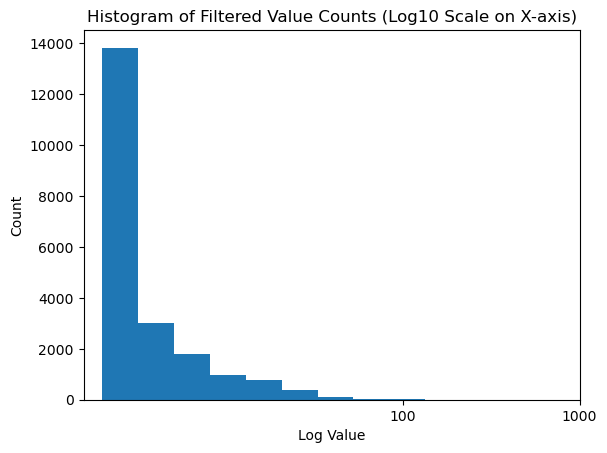

In [59]:
import matplotlib.pyplot as plt

# Set up the histogram with a log base 10 scale on the x-axis and custom x-axis ticks
plt.hist(np.log10(filtered_value_counts), bins=10)  # Apply log10 to the data for x-axis
plt.xlabel('Log Value')
plt.ylabel('Count')
plt.title('Histogram of Filtered Value Counts (Log10 Scale on X-axis)')

# Set custom x-axis ticks starting at 2
x_ticks = np.arange(2, np.log10(filtered_value_counts.max()) + 1, 1)  # Adjust the range as needed
plt.xticks(x_ticks, [int(10**x) for x in x_ticks])  # Convert back to linear scale for tick labels

plt.show()


In [61]:
filtered_value_counts[:10]

feature_name
Midway            215
Fairview          210
Oak Grove         169
Five Points       149
Riverside         127
Pleasant Hill     123
Mount Pleasant    119
Bethel            108
Centerville       107
New Hope          105
Name: count, dtype: int64

In [73]:
combined_string = us_place_names['feature_name'].str.cat(sep=' ')
combined_string[:200]

'Adamana Adobe Agua Fria Ajo Ak Chin Alhambra Ali Chuk Allenville Apache Flats Arizola Arizona City Audley Avondale Bacavi Bagdad Bakerville Bapchule Beardsley Benson Big Springs Bisbee Bisbee Junction'

In [64]:
place_tokens = combined_string.split(' ')

# calling the Encoder algorithm
# we've specified 100 token vocab and 95% to be tokenized
# the other 5% is transformed into UNK
encoder = Encoder(100, pct_bpe=0.95)
encoder.fit(place_tokens)

In [71]:
len(place_tokens)

303730

In [77]:
# print(encoder.tokenize(combined_string[:200]))

print(next(encoder.inverse_transform(encoder.transform([combined_string[:200]]))))

adamana adobe agua fria a__unko ak chin alhambra ali chuk allenville apache flats ari__unkola ari__unkona city audley avondale bacavi bagdad bakerville bapchule beardsley benson big springs bisbee bisbee __unkunction
